In [ ]:
import numpy as np
import load_from_snapshot
import h5py
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import pickle

In [ ]:
fileName = "gmc_MHD"
simNumber = "000"
for n in range(1): #Sets how many simulations to pickle, still need to fix or something
    simNumber='00'+str(n);
    if (n>=10): ext='0'+str(n)                                     #This resolves naming issues
    if (n>=100): ext=str(n)
    datafolder = "/home/hlane/gizmo-public/custom/" + fileName + simNumber + "/output"
    timeList = []
    rhoList = []
    dict = {} #init the empty dictionary
    for i in range(751): #Sets how many snapshots per simulation
        ext='00'+str(i);
        if (i>=10): ext='0'+str(i)                                     #This resolves naming issues
        if (i>=100): ext=str(i)
        f = h5py.File(datafolder + "/snapshot_" + ext + ".hdf5", "r")  #opens file
        try:
            rho = np.float64(np.array(f["PartType0"]["Density"]))
            rhoList.append(rho)
            time = load_from_snapshot.load_from_snapshot("Time",0,datafolder,i)
            timeList.append(time)
            dict[i] = [rhoList, timeList] #assign values for directories
            F = open('pickle/' + fileName + simNumber + '.pickle','wb')
            pickle.dump(dict[i], F)
            F.close()
        except:
            print("Failed to write to file.")

In [ ]:
fileName = "gmc_MHD"
simNumber = "000"
i = 100 #Snapshot identifier
#Need to add simulation identifier
import pickle
F=open('pickle/' + fileName +  simNumber + '.pickle', "rb")
temp = pickle.load(F)
F.close()
rhoList = temp[0]
timeList = temp[1]
print(rhoList[i])
print(timeList[i])

In [ ]:
rho_0 = np.mean(rhoList[i])
logRho_0 = np.log(rho_0)
logRho = np.log(rhoList[i])
s = np.log(rhoList[i] * 26)
sigma = np.std(s)
s_0 = np.mean(s)
plt.hist(s, bins = 1000)
plt.xlabel(r"$n_{\rm H}\, \rm (cm^{-3}$)") 
plt.ylabel('Frequency')
plt.yscale('log', base = 10)
plt.show()

In [ ]:
firstHalf = (np.sqrt(2*np.pi*(sigma))**2)**-1
internals = (s - s_0)**2 / (2*(sigma)**2)
secondHalf = np.exp(-1*internals)

pdf = firstHalf * secondHalf
plt.scatter(s, np.log(pdf), marker=".", s = 0.5)
plt.xlabel('s') 
plt.ylabel('log(PDF)')
plt.show()

In [ ]:
frequencies, edges = np.histogram(s, bins = 1000)
s_centers = np.array((edges[1:]+edges[:-1])/2)
plt.plot(s_centers, frequencies)
plt.xlabel(r"$n_{\rm H}\, \rm (cm^{-3}$)")
plt.yscale('log', base = 10)
plt.ylabel('Frequency')
plt.show()

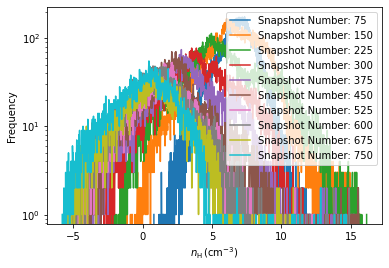

In [1]:
import numpy as np
import load_from_snapshot
import h5py
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import pickle

fileName = "gmc_MHD"
simNumber = "000"

#Script for loading specific snapshot from pickle file, copy + paste for more. Need to add simulation identifier
dict = {}
n = 0
numList = [0]

snapList = [75, 150, 225, 300, 375, 450, 525, 600, 675, 750]
s_centersList = []
frequenciesList = []

for i in snapList:
    F=open('pickle/' + fileName +  simNumber + '.pickle', "rb")
    temp = pickle.load(F)
    F.close()
    rhoList = temp[0]
    timeList = temp[1]
    rho_0 = np.mean(rhoList[i])
    logRho_0 = np.log(rho_0)
    logRho = np.log(rhoList[i])
    s = np.log(rhoList[i] * 26)
    sigma = np.std(s)
    s_0 = np.mean(s)
    frequencies, edges = np.histogram(s, bins = 1000)
    frequenciesList.append(frequencies)
    s_centers = np.array((edges[1:]+edges[:-1])/2)
    s_centersList.append(s_centers)
    n = n+1
    numList.append(n)
    dict[n] = [s_centersList, frequenciesList]
numList.pop() #Removes the last number in numList to prepare for the for loop.
numListCount = len(numList)
#n = 0
#for a in range(numListCount):
for n in numList: 
    plt.plot(s_centersList[n], frequenciesList[n], label="Snapshot Number: " + str(75*(n+1)))
plt.xlabel(r"$n_{\rm H}\, \rm (cm^{-3}$)")
plt.yscale('log', base = 10)
plt.ylabel('Frequency')
plt.legend()
plt.show()

